In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

In [3]:
accident_data=pd.read_csv("accident_data_merged.csv",encoding="utf-8")
print(accident_data.info())

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56651 entries, 0 to 56650
Data columns (total 76 columns):
Unnamed: 0               56651 non-null int64
Unnamed: 0.1             56651 non-null int64
accidenttime             56651 non-null object
accidentaddr             56651 non-null object
driver1fault             56651 non-null int64
driver1responsibility    56651 non-null object
driver2responsibility    56651 non-null object
sex1                     56651 non-null int64
platenumber1             56651 non-null object
carcolor1                56650 non-null object
sex2                     56651 non-null int64
platenumber2             56651 non-null object
carcolor2                56651 non-null object
jxmc1                    56651 non-null object
jxmc2                    56651 non-null object
cclzrq1                  56651 non-null object
cclzrq2                  56651 non-null object
clpp1                    56651 non-null object
clpp2                    56651 non-null object
dri

In [4]:
fault10_index=accident_data[accident_data["driver1fault"]==10].index
accident_data=accident_data.drop(fault10_index,axis=0)

In [5]:
accident_data=accident_data.drop("Unnamed: 0",axis=1)
accident_data=accident_data.drop("Unnamed: 0.1",axis=1)
# print(accident_data.head())

In [6]:
accident_data=accident_data.drop(["id","id_x","id_y"],axis=1)
# print(accident_data.head(3))

In [7]:
# driverfault1=accident_data.loc[accident_data["driver1fault"]==1,["accident_weekday"]]
# driverfault1_day=driverfault1["accident_weekday"].value_counts(sort=False)
# # print(driverfault1_day)
# driverfault1_day=driverfault1_day/driverfault1_day.sum()
# print(driverfault1_day)
driverfault=list(range(0,10))
driverfault_day=list(range(0,10))
for i in range(1,10):
    driverfault[i]=accident_data.loc[accident_data["driver1fault"]==i,["accident_weekday"]]
    driverfault_day[i]=driverfault[i]["accident_weekday"].value_counts(sort=False)\
        .reindex(list(range(0,7)))
    driverfault_day[i]=driverfault_day[i]/driverfault_day[i].sum()
    print(driverfault_day[i])

0    0.148587
1    0.141070
2    0.143055
3    0.148467
4    0.154781
5    0.136621
6    0.127420
Name: accident_weekday, dtype: float64
0    0.113402
1    0.170103
2    0.170103
3    0.128866
4    0.170103
5    0.139175
6    0.108247
Name: accident_weekday, dtype: float64
0    0.145117
1    0.142383
2    0.145898
3    0.139844
4    0.145313
5    0.142187
6    0.139258
Name: accident_weekday, dtype: float64
0    0.157509
1    0.153846
2    0.142857
3    0.142857
4    0.170330
5    0.117216
6    0.115385
Name: accident_weekday, dtype: float64
0    0.146341
1    0.138211
2    0.121951
3    0.140921
4    0.165312
5    0.140921
6    0.146341
Name: accident_weekday, dtype: float64
0    0.115854
1    0.158537
2    0.152439
3    0.189024
4    0.146341
5    0.109756
6    0.128049
Name: accident_weekday, dtype: float64
0    0.143701
1    0.143832
2    0.140858
3    0.141776
4    0.153584
5    0.145756
6    0.130494
Name: accident_weekday, dtype: float64
0    0.147924
1    0.144509
2    0.136889

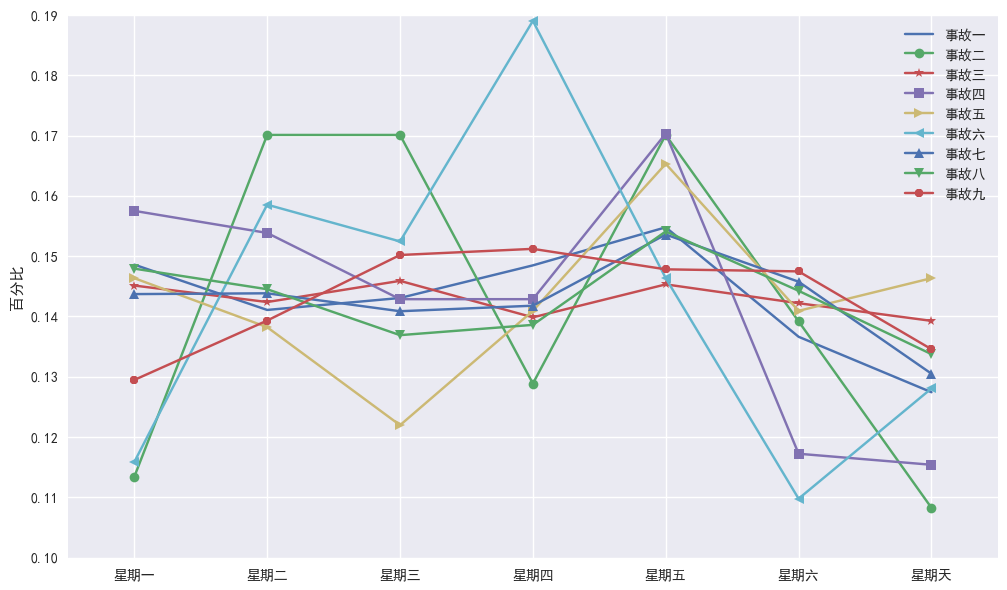

In [8]:
fig=plt.figure(figsize=(12,7),facecolor="white",edgecolor="white")
plt.plot(driverfault_day[1].index,driverfault_day[1],marker="+")
plt.plot(driverfault_day[2].index,driverfault_day[2],marker="o")
plt.plot(driverfault_day[3].index,driverfault_day[3],marker="*")
plt.plot(driverfault_day[4].index,driverfault_day[4],marker="s")
plt.plot(driverfault_day[5].index,driverfault_day[5],marker=">")
plt.plot(driverfault_day[6].index,driverfault_day[6],marker="<")
plt.plot(driverfault_day[7].index,driverfault_day[7],marker="^")
plt.plot(driverfault_day[8].index,driverfault_day[8],marker="v")
plt.plot(driverfault_day[9].index,driverfault_day[9],marker="8")
# plt.xlim([0,7])
plt.xticks(driverfault_day[1].index,["星期一","星期二","星期三","星期四","星期五","星期六","星期天"])
plt.xlim(-0.5, 6.5)
plt.ylabel("百分比")
plt.legend(["事故一","事故二","事故三","事故四","事故五","事故六","事故七","事故八","事故九"])
# plt.grid(False)
plt.show()
fig.savefig("driverfault_weekday.png")

0     0.009681
1     0.001082
2     0.001323
3     0.001804
4     0.001503
5     0.002646
6     0.005773
7     0.040469
8     0.097595
9     0.081780
10    0.082562
11    0.074865
12    0.058629
13    0.066627
14    0.075406
15    0.067709
16    0.067589
17    0.074083
18    0.067108
19    0.037222
20    0.030667
21    0.028142
22    0.018461
23    0.007276
Name: accident_hour, dtype: float64
0     0.005155
1     0.000000
2     0.000000
3     0.010309
4     0.000000
5     0.010309
6     0.015464
7     0.046392
8     0.077320
9     0.092784
10    0.061856
11    0.082474
12    0.087629
13    0.092784
14    0.082474
15    0.041237
16    0.077320
17    0.077320
18    0.030928
19    0.010309
20    0.051546
21    0.010309
22    0.020619
23    0.015464
Name: accident_hour, dtype: float64
0     0.012305
1     0.002148
2     0.002734
3     0.001563
4     0.002344
5     0.001563
6     0.006641
7     0.030664
8     0.073828
9     0.080664
10    0.086719
11    0.082227
12    0.077344
13    0.07578

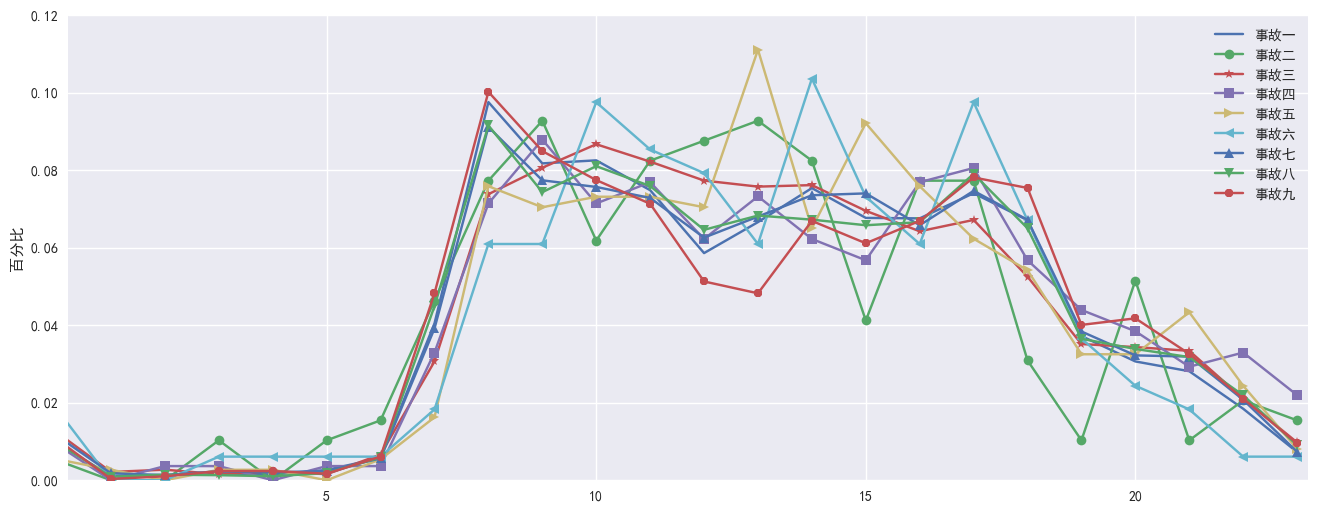

In [9]:
fault_hour=list(range(0,24))
for i in range(1,10):
    fault_hour[i]=accident_data.loc[accident_data["driver1fault"]==i,"accident_hour"].value_counts().reindex(list(range(0,24)))
    fault_hour[i]=fault_hour[i]/fault_hour[i].sum()
    fault_hour[i]=fault_hour[i].fillna(0)
    print(fault_hour[i])
fig=plt.figure(figsize=(16,6),facecolor="white",edgecolor="white")
plt.plot(fault_hour[1].index,fault_hour[1],marker="+")
plt.plot(fault_hour[2].index,fault_hour[2],marker="o")
plt.plot(fault_hour[3].index,fault_hour[3],marker="*")
plt.plot(fault_hour[4].index,fault_hour[4],marker="s")
plt.plot(fault_hour[5].index,fault_hour[5],marker=">")
plt.plot(fault_hour[6].index,fault_hour[6],marker="<")
plt.plot(fault_hour[7].index,fault_hour[7],marker="^")
plt.plot(fault_hour[8].index,fault_hour[8],marker="v")
plt.plot(fault_hour[9].index,fault_hour[9],marker="8")
plt.xlim([0.2,23.2])
# plt.xticks(fault_hour[1].index,["星期一","星期二","星期三","星期四","星期五","星期六","星期天"])
plt.ylabel("百分比")
plt.legend(["事故一","事故二","事故三","事故四","事故五","事故六","事故七","事故八","事故九"])
# plt.grid(False)
plt.show()
fig.savefig("driverfault_hour.png")

0     0.000000
1     0.000532
2     0.046694
3     0.104630
4     0.109352
5     0.091592
6     0.091925
7     0.104230
8     0.111414
9     0.105827
10    0.115272
11    0.118531
Name: accident_month, dtype: float64
0     0.000000
1     0.000000
2     0.028736
3     0.091954
4     0.132184
5     0.143678
6     0.068966
7     0.120690
8     0.063218
9     0.086207
10    0.132184
11    0.132184
Name: accident_month, dtype: float64
0     0.000000
1     0.000216
2     0.045504
3     0.102006
4     0.109338
5     0.101143
6     0.097908
7     0.107181
8     0.104378
9     0.110632
10    0.103731
11    0.117964
Name: accident_month, dtype: float64
0     0.000000
1     0.000000
2     0.050100
3     0.066132
4     0.110220
5     0.132265
6     0.116232
7     0.094188
8     0.120240
9     0.096192
10    0.096192
11    0.118236
Name: accident_month, dtype: float64
0     0.000000
1     0.000000
2     0.070796
3     0.112094
4     0.097345
5     0.079646
6     0.091445
7     0.103245
8     0.1268

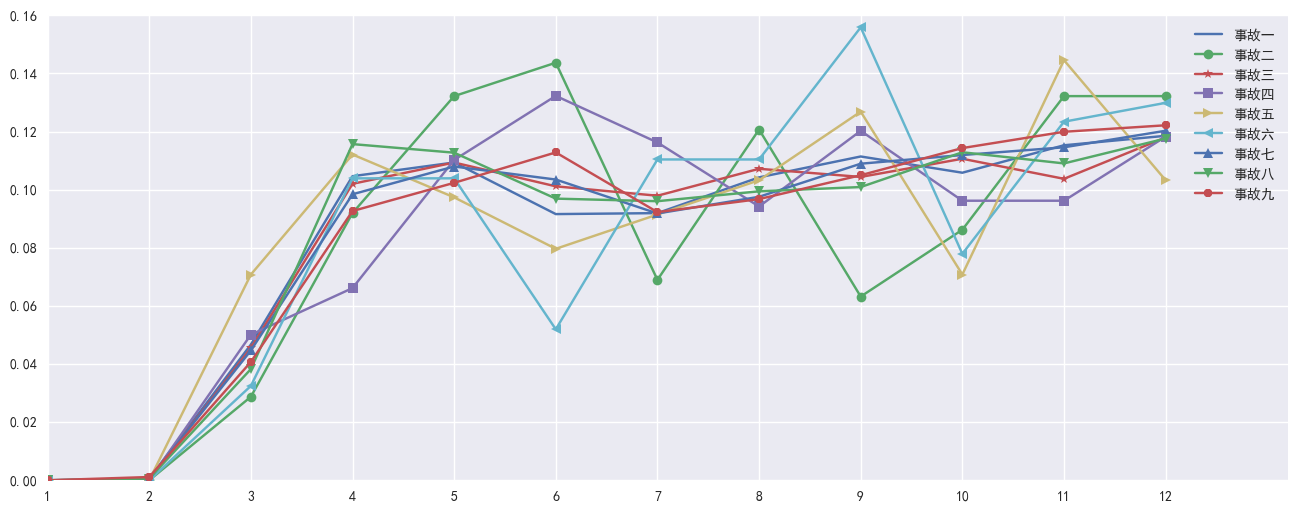

In [10]:
fault_month=list(range(0,12))
for i in range(1,10):
    fault_month[i]=accident_data.loc[accident_data["driver1fault"]==i,"accident_month"].value_counts().reindex(list(range(0,12)))
    fault_month[i]=fault_month[i]/fault_month[i].sum()
    fault_month[i]=fault_month[i].fillna(0)
    print(fault_month[i])
fig=plt.figure(figsize=(16,6),facecolor="white",edgecolor="white")
plt.plot(fault_month[1].index,fault_month[1],marker="+")
plt.plot(fault_month[2].index,fault_month[2],marker="o")
plt.plot(fault_month[3].index,fault_month[3],marker="*")
plt.plot(fault_month[4].index,fault_month[4],marker="s")
plt.plot(fault_month[5].index,fault_month[5],marker=">")
plt.plot(fault_month[6].index,fault_month[6],marker="<")
plt.plot(fault_month[7].index,fault_month[7],marker="^")
plt.plot(fault_month[8].index,fault_month[8],marker="v")
plt.plot(fault_month[9].index,fault_month[9],marker="8")
plt.xlim([0.2,12.2])
plt.xticks(fault_month[1].index,fault_month[1].index+1)
# plt.ylabel("百分比")
plt.legend(["事故一","事故二","事故三","事故四","事故五","事故六","事故七","事故八","事故九"])
# plt.grid(False)
plt.show()
fig.savefig("driverfault_month.png")

In [11]:
color_map={"白色":"白","黑色":"黑","红色":"红","银色":"银","灰色":"灰",
           "黄色":"黄","绿色":"绿","蓝色":"蓝"," 白色":"白","黑 ":"黑",
           "北":"白"," 银":"银","BAI":"白","棕色": '灰'}
carcolor1=accident_data["carcolor1"]
carcolor2=accident_data["carcolor2"]

carcolor1=carcolor1.replace(color_map)
carcolor2=carcolor2.replace(color_map)
other1=carcolor1.value_counts()[8:].index
carcolor1=carcolor1.replace(other1,"其他")
other2=carcolor2.value_counts()[8:].index
carcolor2=carcolor2.replace(other2,"其他") 
accident_data["carcolor1"]=carcolor1
accident_data["carcolor2"]=carcolor2
# print(accident_data["carcolor1"].value_counts())
# print(accident_data["carcolor2"].value_counts())
# 
colormap2={"白":1,"黑":2,"银":3,"红":4,"蓝":5,"黄":6,"绿":7,"灰":8,"其他":0}
accident_data["carcolor1"]=accident_data["carcolor1"].replace(colormap2)
accident_data["carcolor2"]=accident_data["carcolor2"].replace(colormap2)
print(accident_data["carcolor1"].value_counts())
print(accident_data["carcolor2"].value_counts())

1.0    30507
2.0     7882
3.0     7383
4.0     3992
5.0     2842
6.0     2056
7.0     1507
0.0      153
8.0      122
Name: carcolor1, dtype: int64
1    29123
2     8385
3     6894
4     4074
5     4027
6     2145
7     1479
0      195
8      123
Name: carcolor2, dtype: int64


In [12]:
fault_color1=list(range(0,8))
for i in range(1,8):
    fault_color1[i]=accident_data.loc[accident_data["carcolor1"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_color1[i]=fault_color1[i]/fault_color1[i].sum()
    print(fault_color1[i])

1    0.286885
2    0.003114
3    0.094601
4    0.009145
5    0.005868
6    0.002950
7    0.421051
8    0.127315
9    0.049071
Name: driver1fault, dtype: float64
1    0.306141
2    0.003552
3    0.087795
4    0.009642
5    0.007866
6    0.001903
7    0.388226
8    0.142857
9    0.052017
Name: driver1fault, dtype: float64
1    0.311120
2    0.003928
3    0.091562
4    0.011919
5    0.006231
6    0.002573
7    0.381552
8    0.134905
9    0.056210
Name: driver1fault, dtype: float64
1    0.276303
2    0.004008
3    0.089679
4    0.011523
5    0.005511
6    0.002756
7    0.392285
8    0.156062
9    0.061874
Name: driver1fault, dtype: float64
1    0.313863
2    0.003519
3    0.074595
4    0.009500
5    0.008445
6    0.005982
7    0.394089
8    0.134764
9    0.055243
Name: driver1fault, dtype: float64
1    0.282588
2    0.005350
3    0.084144
4    0.009728
5    0.008268
6    0.001459
7    0.377432
8    0.172665
9    0.058366
Name: driver1fault, dtype: float64
1    0.332449
2    0.002654
3    0

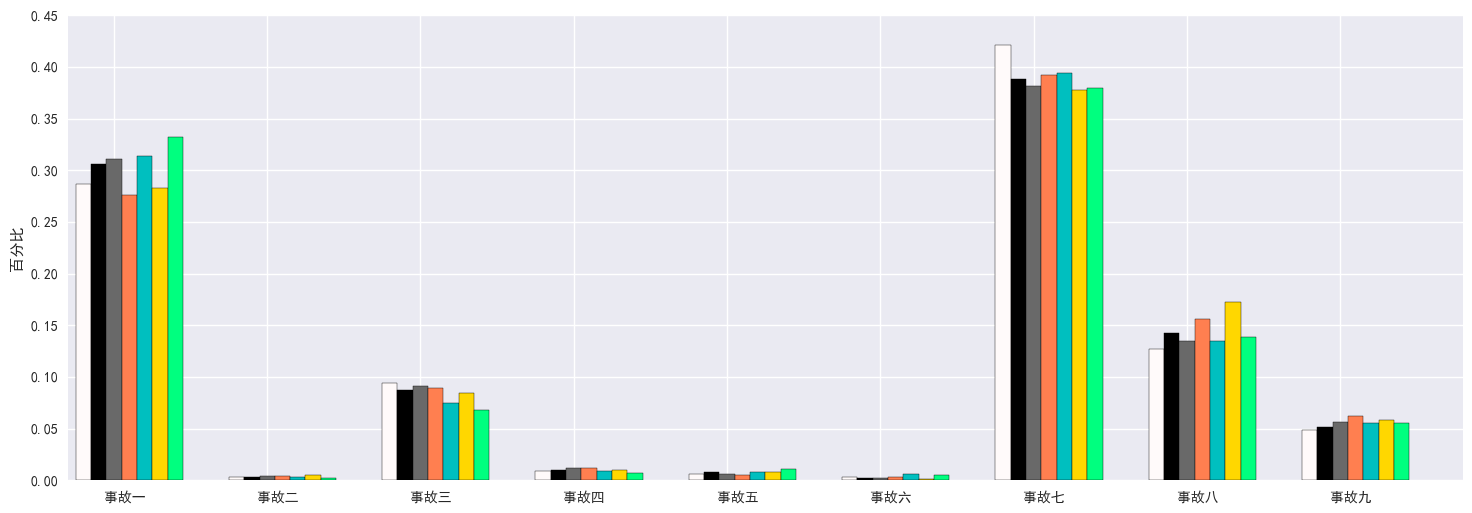

In [13]:
fig=plt.figure(facecolor="white",figsize=(18,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_color1[1],width,color="snow")
plt.bar(xlabel+width,fault_color1[2],width,color="k")
plt.bar(xlabel+width*2,fault_color1[3],width,color="dimgray")
plt.bar(xlabel+width*3,fault_color1[4],width,color="coral")
plt.bar(xlabel+width*4,fault_color1[5],width,color="c")
plt.bar(xlabel+width*5,fault_color1[6],width,color="gold")
plt.bar(xlabel+width*6,fault_color1[7],width,color="springgreen")
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_color.png")

In [14]:
fault_color2=list(range(0,8))
for i in range(1,8):
    fault_color2[i]=accident_data.loc[accident_data["carcolor2"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_color2[i]=fault_color2[i]/fault_color2[i].sum()
    print(fault_color2[i])

1    0.293170
2    0.003125
3    0.095011
4    0.009408
5    0.006387
6    0.003228
7    0.415136
8    0.124541
9    0.049995
Name: driver1fault, dtype: float64
1    0.308766
2    0.003459
3    0.099821
4    0.009541
5    0.007275
6    0.002266
7    0.380918
8    0.139296
9    0.048658
Name: driver1fault, dtype: float64
1    0.323470
2    0.003191
3    0.095010
4    0.011024
5    0.005802
6    0.003191
7    0.361474
8    0.145924
9    0.050914
Name: driver1fault, dtype: float64
1    0.273687
2    0.003682
3    0.087629
4    0.011782
5    0.005646
6    0.001473
7    0.397644
8    0.155866
9    0.062592
Name: driver1fault, dtype: float64
1    0.247331
2    0.004966
3    0.058604
4    0.009933
5    0.008195
6    0.001490
7    0.457661
8    0.147504
9    0.064316
Name: driver1fault, dtype: float64
1    0.271329
2    0.004662
3    0.084848
4    0.009324
5    0.006061
6    0.005128
7    0.399068
8    0.163636
9    0.055944
Name: driver1fault, dtype: float64
1    0.318458
2    0.004057
3    0

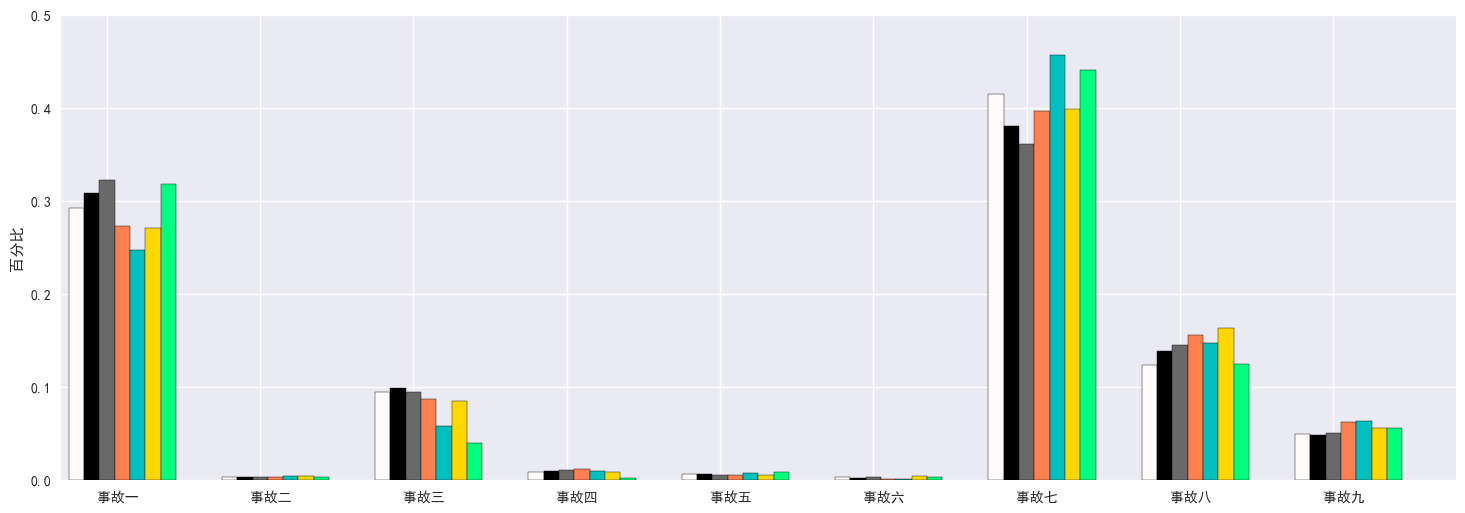

In [15]:
fig=plt.figure(facecolor="white",figsize=(18,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_color2[1],width,color="snow")
plt.bar(xlabel+width,fault_color2[2],width,color="k")
plt.bar(xlabel+width*2,fault_color2[3],width,color="dimgray")
plt.bar(xlabel+width*3,fault_color2[4],width,color="coral")
plt.bar(xlabel+width*4,fault_color2[5],width,color="c")
plt.bar(xlabel+width*5,fault_color2[6],width,color="gold")
plt.bar(xlabel+width*6,fault_color2[7],width,color="springgreen")
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_color2.png")

In [16]:
# print(accident_data["weather2"].value_counts())
weather_map={"多云":0,"阵雨":1,"阴":2,"小雨":3,"晴":4,"中雨":5,"雷阵雨":6,
             "大雨":7,"暴雨":8,"冻雨":8}
# accident_data["weather1"]=accident_data["weather1"].replace(weather_map)
accident_data["weather2"]=accident_data["weather2"].replace(weather_map)
accident_data["weather1"]=accident_data["weather1"].replace(weather_map)
# print(accident_data["weather1"].value_counts())
# print(accident_data["weather2"].value_counts())

In [17]:
fault_weather=list(range(0,10))
for i in range(1,10):
    fault_weather[i]=accident_data.loc[accident_data["driver1fault"]==i,"weather2"].value_counts().reindex(list(range(0,8)))
    fault_weather[i]=fault_weather[i]/fault_weather[i].sum()
    print(fault_weather[i])

0    0.283107
1    0.302198
2    0.146341
3    0.163565
4    0.018248
5    0.015658
6    0.051129
7    0.019753
Name: weather2, dtype: float64
0    0.253886
1    0.341969
2    0.145078
3    0.145078
4    0.020725
5    0.010363
6    0.082902
7         NaN
Name: weather2, dtype: float64
0    0.279561
1    0.318520
2    0.150157
3    0.156030
4    0.015074
5    0.015857
6    0.048356
7    0.016445
Name: weather2, dtype: float64
0    0.252747
1    0.326007
2    0.150183
3    0.157509
4    0.018315
5    0.018315
6    0.051282
7    0.025641
Name: weather2, dtype: float64
0    0.297003
1    0.335150
2    0.122616
3    0.149864
4    0.019074
5    0.013624
6    0.051771
7    0.010899
Name: weather2, dtype: float64
0    0.286585
1    0.310976
2    0.158537
3    0.115854
4    0.012195
5    0.030488
6    0.048780
7    0.036585
Name: weather2, dtype: float64
0    0.278194
1    0.317905
2    0.145124
3    0.155073
4    0.019066
5    0.015428
6    0.051589
7    0.017620
Name: weather2, dtype: float64

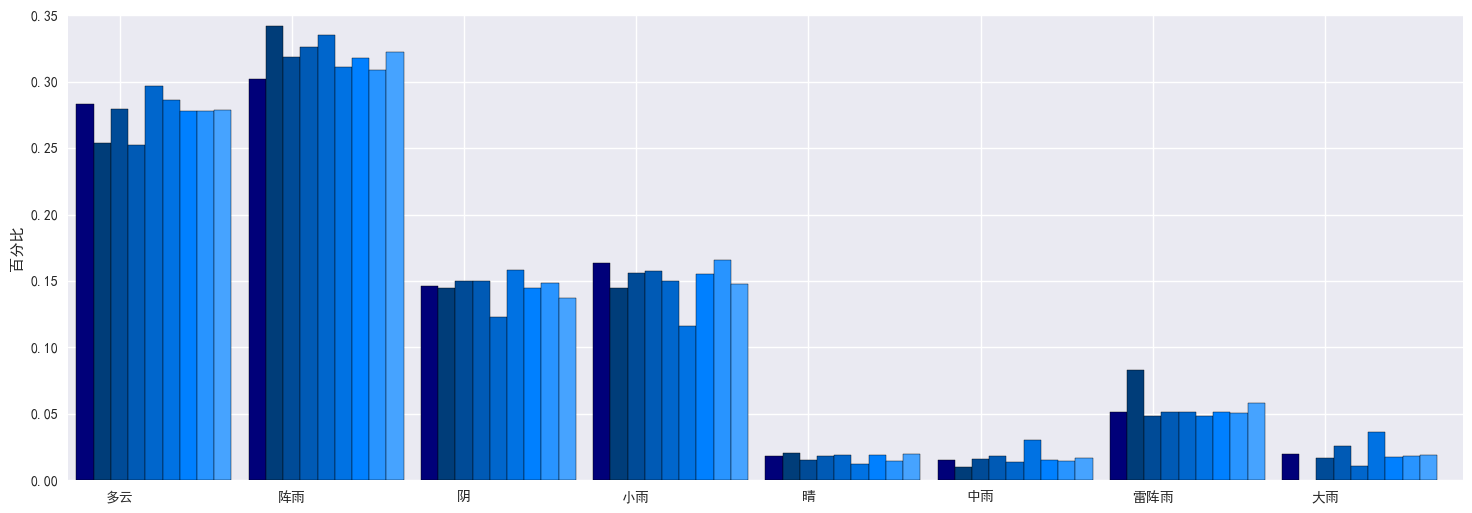

In [18]:
# sns.set_style("white")
fig=plt.figure(facecolor="white",figsize=(18,6))
xlabel=np.arange(8)
width = 0.1
plt.bar(xlabel,fault_weather[1],width,color="#000079")
plt.bar(xlabel+width,fault_weather[2],width,color="#003D79")
plt.bar(xlabel+width*2,fault_weather[3],width,color="#004B97")
plt.bar(xlabel+width*3,fault_weather[4],width,color="#005AB5")
plt.bar(xlabel+width*4,fault_weather[5],width,color="#0066CC")
plt.bar(xlabel+width*5,fault_weather[6],width,color="#0072E3")
plt.bar(xlabel+width*6,fault_weather[7],width,color="#0080FF")
plt.bar(xlabel+width*7,fault_weather[8],width,color="#2894FF")
plt.bar(xlabel+width*8,fault_weather[9],width,color="#46A3FF")
plt.xticks(xlabel+0.25,["多云","阵雨","阴","小雨","晴","中雨","雷阵雨","大雨","暴雨"])
plt.xlim(-0.05,8.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_weather.png")

In [19]:
def get_age(age):
    if (age<30):
        return 0
    elif (age>29 and age<45) :
        return 1
    elif (age>44 and age<60):
        return 2
    else :
        return 3
accident_data["driver1_age_category"]=accident_data["driver1_age"].apply(get_age)
print(accident_data["driver1_age_category"].value_counts())

1    27413
0    15185
2    11790
3     2057
Name: driver1_age_category, dtype: int64


In [20]:
fault_age1=list(range(0,4))
for i in range(0,4):
    fault_age1[i]=accident_data.loc[accident_data["driver1_age_category"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_age1[i]=fault_age1[i]/fault_age1[i].sum()
    print(fault_age1[i])

1    0.338426
2    0.004083
3    0.093184
4    0.010800
5    0.005861
6    0.002634
7    0.362924
8    0.130985
9    0.051103
Name: driver1fault, dtype: float64
1    0.292452
2    0.003320
3    0.089155
4    0.009558
5    0.006128
6    0.002955
7    0.404808
8    0.138256
9    0.053369
Name: driver1fault, dtype: float64
1    0.252926
2    0.003308
3    0.090925
4    0.008651
5    0.008227
6    0.002969
7    0.451739
8    0.131552
9    0.049703
Name: driver1fault, dtype: float64
1    0.239183
2    0.000972
3    0.091881
4    0.008751
5    0.007292
6    0.003889
7    0.453573
8    0.137093
9    0.057365
Name: driver1fault, dtype: float64


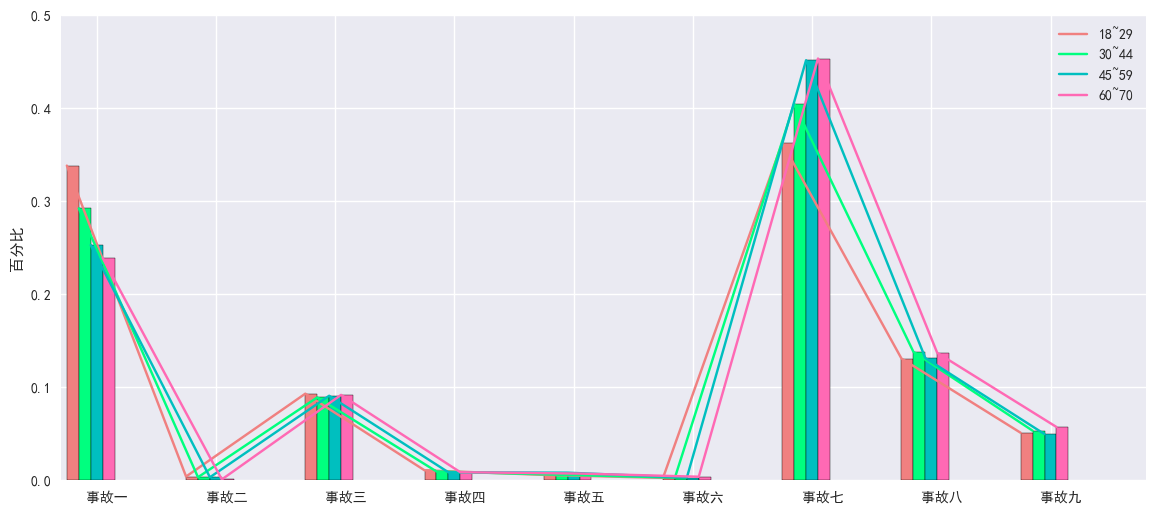

In [21]:
fig=plt.figure(facecolor="white",figsize=(14,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_age1[0],width,color="lightcoral")
plt.bar(xlabel+width,fault_age1[1],width,color="springgreen")
plt.bar(xlabel+width*2,fault_age1[2],width,color="c")
plt.bar(xlabel+width*3,fault_age1[3],width,color="hotpink")
plt.plot(xlabel,fault_age1[0],color="lightcoral")
plt.plot(xlabel+width,fault_age1[1],color="springgreen")
plt.plot(xlabel+width*2,fault_age1[2],color="c")
plt.plot(xlabel+width*3,fault_age1[3],color="hotpink")
plt.legend(["18~29","30~44","45~59","60~70"])
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_age1.png")

In [22]:
accident_data["driver2_age_category"]=accident_data["driver2_age"].apply(get_age)
print(accident_data["driver2_age_category"].value_counts())
fault_age2=list(range(0,4))
for i in range(0,4):
    fault_age2[i]=accident_data.loc[accident_data["driver2_age_category"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_age2[i]=fault_age2[i]/fault_age2[i].sum()
    print(fault_age2[i])

1    28444
0    14909
2    10965
3     2127
Name: driver2_age_category, dtype: int64
1    0.268831
2    0.004024
3    0.091757
4    0.009524
5    0.005701
6    0.002951
7    0.428533
8    0.139647
9    0.049031
Name: driver1fault, dtype: float64
1    0.291485
2    0.003762
3    0.092744
4    0.009563
5    0.006363
6    0.002848
7    0.407116
8    0.136303
9    0.049817
Name: driver1fault, dtype: float64
1    0.334701
2    0.001733
3    0.085180
4    0.009941
5    0.008026
6    0.002827
7    0.372914
8    0.124487
9    0.060192
Name: driver1fault, dtype: float64
1    0.310766
2    0.003761
3    0.084626
4    0.010813
5    0.007052
6    0.003761
7    0.380348
8    0.135402
9    0.063470
Name: driver1fault, dtype: float64


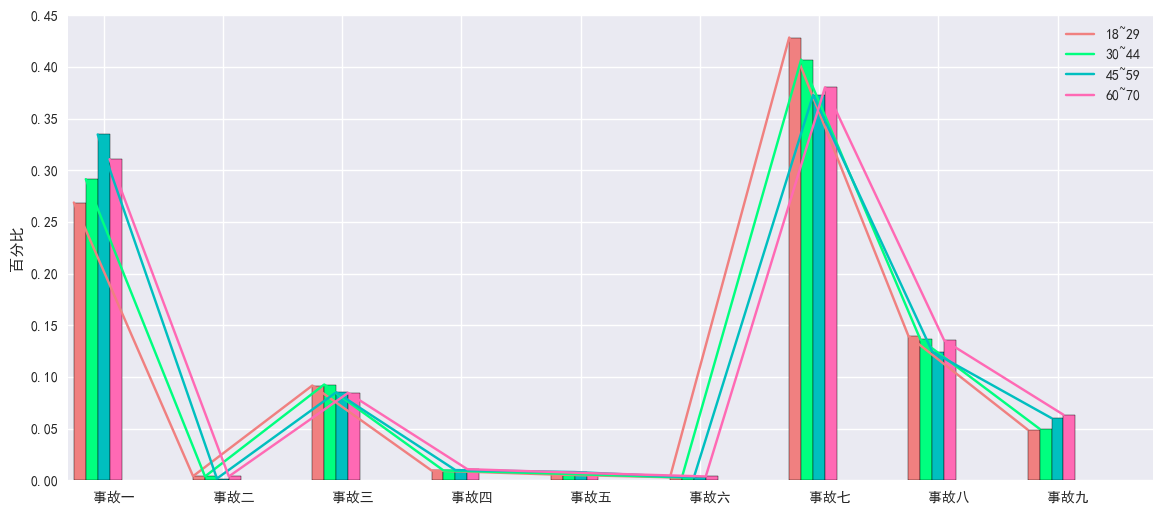

In [23]:
fig=plt.figure(facecolor="white",figsize=(14,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_age2[0],width,color="lightcoral")
plt.bar(xlabel+width,fault_age2[1],width,color="springgreen")
plt.bar(xlabel+width*2,fault_age2[2],width,color="c")
plt.bar(xlabel+width*3,fault_age2[3],width,color="hotpink")
plt.plot(xlabel,fault_age2[0],color="lightcoral")
plt.plot(xlabel+width,fault_age2[1],color="springgreen")
plt.plot(xlabel+width*2,fault_age2[2],color="c")
plt.plot(xlabel+width*3,fault_age2[3],color="hotpink")
plt.legend(["18~29","30~44","45~59","60~70"])
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_age2.png")

In [24]:
# print(accident_data["driver1_years"].value_counts())
driver1_years_mean=accident_data["driver1_years"].mean()
driver1_years_std=accident_data["driver1_years"].std()

age_null_count=accident_data["driver1_years"].isnull().sum()
age_null_random_list=np.random.randint\
                    (driver1_years_mean-driver1_years_std,driver1_years_mean+driver1_years_std,age_null_count)
accident_data["driver1_years"][np.isnan(accident_data["driver1_years"])]=age_null_random_list
accident_data["driver1_years"]=accident_data["driver1_years"].astype(int)
print(accident_data["driver1_years"].value_counts())

# accident_data["driver1_years"]=accident_data["driver1_years"].fillna(mean)
# print(accident_data["driver2_years"].value_counts())

3     4736
1     3882
10    3781
8     3754
0     3671
4     3651
11    3649
2     3621
9     3160
12    2936
7     2879
5     2740
6     2646
13    2537
14    1220
15     855
17     845
18     823
16     822
20     782
19     749
21     688
22     502
23     303
25     239
24     235
26     130
29     110
28      97
27      84
30      61
31      57
35      38
32      38
34      28
36      22
33      22
37      16
38       9
41       6
40       5
39       4
42       4
43       4
44       1
45       1
47       1
49       1
Name: driver1_years, dtype: int64


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
def get_year(year):
    if year<4:
        return 0
    elif (year>3 and year<11):
        return 1
    elif (year>10 and year<21):
        return 2
    else:
        return 3
accident_data["driver1_year_category"]=accident_data["driver1_years"].apply(get_year)
print(accident_data["driver1_year_category"].value_counts())
fault_year1=list(range(0,4))
for i in range(0,4):
    fault_year1[i]=accident_data.loc[accident_data["driver1_year_category"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_year1[i]=fault_year1[i]/fault_year1[i].sum()
    print(fault_year1[i])

1    22611
0    15910
2    15218
3     2706
Name: driver1_year_category, dtype: int64
1    0.288938
2    0.003457
3    0.083721
4    0.009554
5    0.006034
6    0.002891
7    0.417788
8    0.138969
9    0.048649
Name: driver1fault, dtype: float64
1    0.295785
2    0.003759
3    0.097475
4    0.010437
5    0.005971
6    0.002875
7    0.402238
8    0.129893
9    0.051568
Name: driver1fault, dtype: float64
1    0.300237
2    0.003220
3    0.089894
4    0.008083
5    0.007885
6    0.002760
7    0.396241
8    0.137206
9    0.054475
Name: driver1fault, dtype: float64
1    0.286770
2    0.001848
3    0.079823
4    0.012934
5    0.006652
6    0.004065
7    0.404656
8    0.138950
9    0.064302
Name: driver1fault, dtype: float64


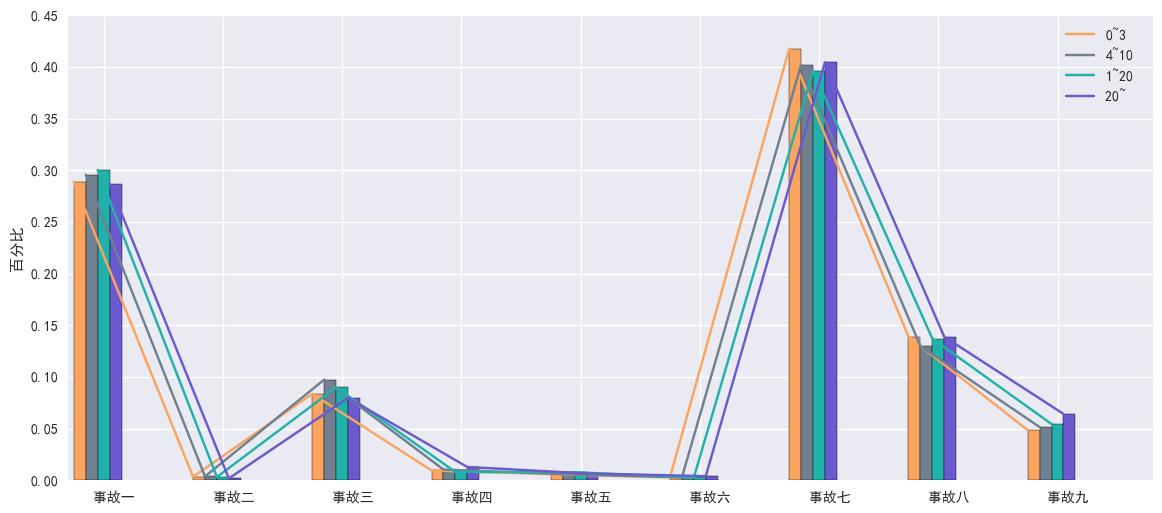

In [26]:
fig=plt.figure(facecolor="white",figsize=(14,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_year1[0],width,color="sandybrown")
plt.bar(xlabel+width,fault_year1[1],width,color="slategrey")
plt.bar(xlabel+width*2,fault_year1[2],width,color="lightseagreen")
plt.bar(xlabel+width*3,fault_year1[3],width,color="slateblue")
plt.plot(xlabel,fault_year1[0],color="sandybrown")
plt.plot(xlabel+width,fault_year1[1],color="slategrey")
plt.plot(xlabel+width*2,fault_year1[2],color="lightseagreen")
plt.plot(xlabel+width*3,fault_year1[3],color="slateblue")
plt.legend(["0~3","4~10","1~20","20~  "])
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_year1.png")

In [27]:
accident_data["driver2_years"]=accident_data["driver2_years"].replace(-27,np.nan)
# print(accident_data["driver2_years"])
driver2_years_mean=accident_data["driver2_years"].mean()
driver2_years_std=accident_data["driver2_years"].std()

age_null_count=accident_data["driver2_years"].isnull().sum()
age_null_random_list=np.random.randint\
                    (driver2_years_mean-driver2_years_std,driver2_years_mean+driver2_years_std,age_null_count)
accident_data["driver2_years"][np.isnan(accident_data["driver2_years"])]=age_null_random_list
accident_data["driver2_years"]=accident_data["driver2_years"].astype(int)
print(accident_data["driver2_years"].value_counts())

3     4700
1     3869
8     3742
10    3691
0     3671
11    3651
4     3637
2     3632
9     3223
7     3000
12    2914
5     2766
6     2628
13    2519
14    1220
15     855
17     845
18     823
16     822
20     782
19     749
21     688
22     502
23     303
25     239
24     235
26     130
29     110
28      97
27      84
30      61
31      57
35      38
32      38
34      28
36      22
33      22
37      16
38       9
41       6
40       5
39       4
42       4
43       4
44       1
45       1
47       1
49       1
Name: driver2_years, dtype: int64


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    0.283833
2    0.003465
3    0.083669
4    0.009325
5    0.005985
6    0.003024
7    0.422127
8    0.138609
9    0.049962
Name: driver1fault, dtype: float64
1    0.297880
2    0.003835
3    0.097897
4    0.010182
5    0.006347
6    0.002645
7    0.397937
8    0.130956
9    0.052321
Name: driver1fault, dtype: float64
1    0.302437
2    0.003096
3    0.089262
4    0.008696
5    0.007378
6    0.002964
7    0.398155
8    0.136034
9    0.051976
Name: driver1fault, dtype: float64
1    0.286770
2    0.001848
3    0.079823
4    0.012934
5    0.006652
6    0.004065
7    0.404656
8    0.138950
9    0.064302
Name: driver1fault, dtype: float64


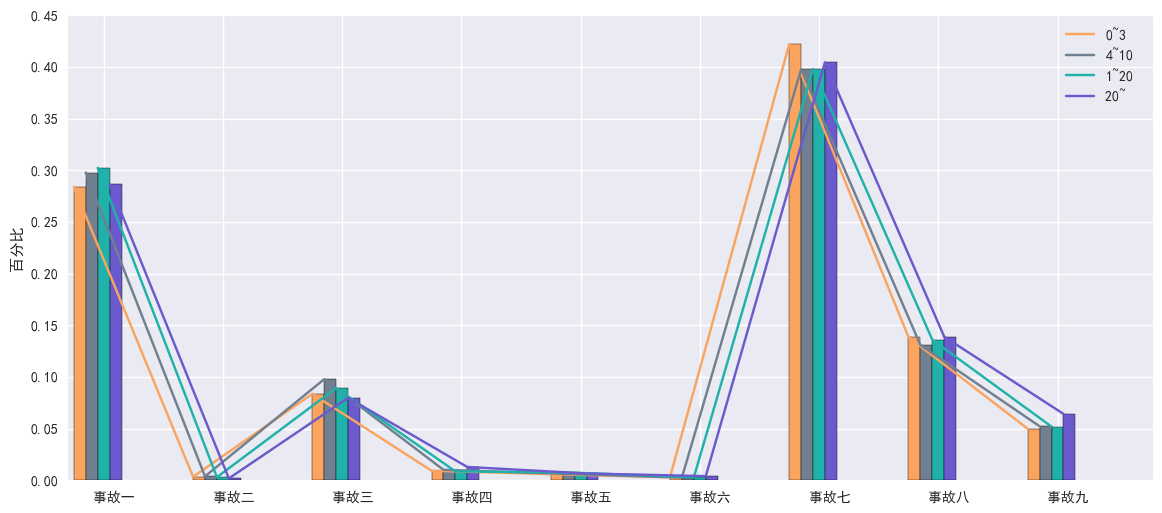

In [28]:
accident_data["driver2_year_category"]=accident_data["driver2_years"].apply(get_year)
# print(accident_data["driver2_year_category"].value_counts())
fault_year2=list(range(0,4))
for i in range(0,4):
    fault_year2[i]=accident_data.loc[accident_data["driver2_year_category"]==i,"driver1fault"].value_counts().reindex(list(range(1,10)))
    fault_year2[i]=fault_year2[i]/fault_year2[i].sum()
    print(fault_year2[i])
    
fig=plt.figure(facecolor="white",figsize=(14,6))
xlabel=np.arange(9)
width = 0.1
plt.bar(xlabel,fault_year2[0],width,color="sandybrown")
plt.bar(xlabel+width,fault_year2[1],width,color="slategrey")
plt.bar(xlabel+width*2,fault_year2[2],width,color="lightseagreen")
plt.bar(xlabel+width*3,fault_year2[3],width,color="slateblue")
plt.plot(xlabel,fault_year2[0],color="sandybrown")
plt.plot(xlabel+width,fault_year2[1],color="slategrey")
plt.plot(xlabel+width*2,fault_year2[2],color="lightseagreen")
plt.plot(xlabel+width*3,fault_year2[3],color="slateblue")
plt.legend(["0~3","4~10","1~20","20~  "])
plt.xticks(xlabel+0.25,["   事故一","   事故二","   事故三","   事故四","   事故五","   事故六","   事故七","   事故八","   事故九"])
plt.xlim(-0.05,9.05)
plt.ylabel("百分比")
plt.show()
fig.savefig("fault_year2.png")

In [4]:
# print(accident_data["is_province1"].value_counts())
fault_province10=accident_data.\
    loc[accident_data["is_driver1_province"]==True,"driver1fault"].value_counts().\
                    reindex(list(range(1,10)))
fault_province11=accident_data.\
    loc[accident_data["is_driver1_province"]==False,"driver1fault"].value_counts().\
                    reindex(list(range(1,10)))
fault_province20=accident_data.\
    loc[accident_data["is_driver2_province"]==True,"driver1fault"].value_counts().\
                    reindex(list(range(1,10)))
fault_province21=accident_data.\
    loc[accident_data["is_driver2_province"]==False,"driver1fault"].value_counts().\
                    reindex(list(range(1,10)))
fault_province10=fault_province10/fault_province10.sum()
fault_province11=fault_province11/fault_province11.sum()
fault_province20=fault_province20/fault_province20.sum()
fault_province21=fault_province21/fault_province21.sum()


print(fault_province10)
print(fault_province11)
print(fault_province20)
print(fault_province21)

1    0.294341
2    0.003373
3    0.087546
4    0.008841
5    0.006592
6    0.002844
7    0.408453
8    0.132851
9    0.055160
Name: driver1fault, dtype: float64
1    0.295778
2    0.003698
3    0.103644
4    0.013080
5    0.006314
6    0.003157
7    0.391485
8    0.143063
9    0.039780
Name: driver1fault, dtype: float64
1    0.290995
2    0.003469
3    0.086926
4    0.009487
5    0.006810
6    0.002934
7    0.414070
8    0.135582
9    0.049727
Name: driver1fault, dtype: float64
1    0.312000
2    0.003282
3    0.108821
4    0.010564
5    0.005231
6    0.002769
7    0.362256
8    0.131385
9    0.063692
Name: driver1fault, dtype: float64


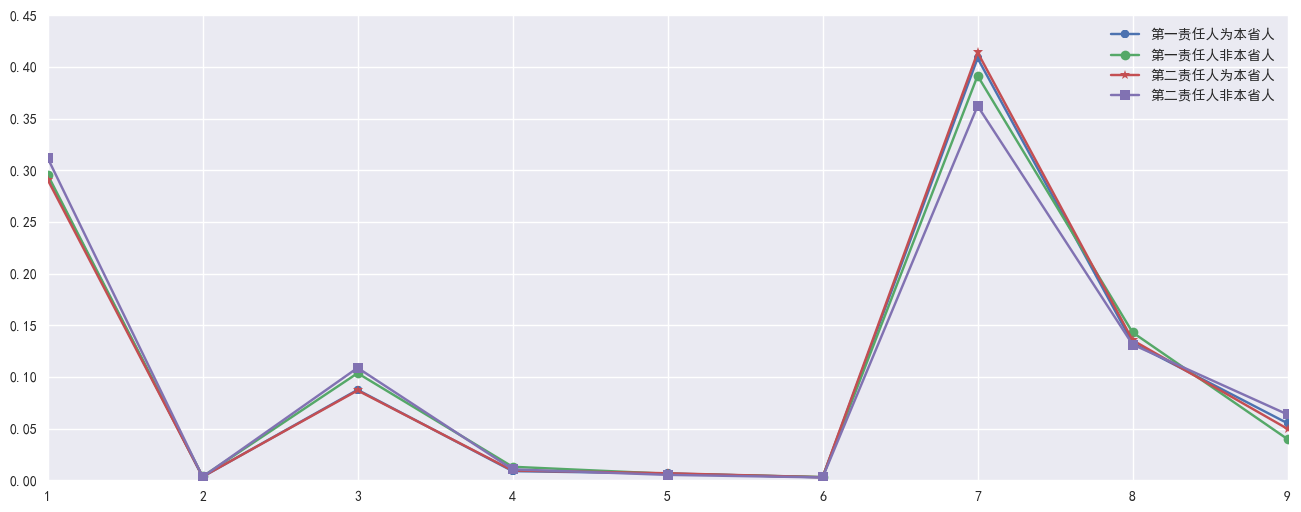

In [5]:
fig=plt.figure(figsize=(16,6),facecolor="white",edgecolor="white")
plt.plot(fault_province10.index,fault_province10,marker="8")
plt.plot(fault_province11.index,fault_province11,marker="o")
plt.plot(fault_province20.index,fault_province20,marker="*")
plt.plot(fault_province21.index,fault_province21,marker="s")
plt.legend(["第一责任人为本省人","第一责任人非本省人","第二责任人为本省人","第二责任人非本省人"])
plt.show()
fig.savefig("fault_province.png")

In [31]:
print(accident_data["district"].value_counts())

南明区     13922
云岩区     11789
乌当区      9709
花溪区      7546
观山湖区     3875
白云区      2814
Name: district, dtype: int64


In [32]:
district_map={"南明区":0,"云岩区":1,"乌当区":2,"花溪区":3,"观山湖区":4,"白云区":5}
accident_data["district"]=accident_data["district"].replace(district_map)
print(accident_data["district"].value_counts())

0.0    13922
1.0    11789
2.0     9709
3.0     7546
4.0     3875
5.0     2814
Name: district, dtype: int64


In [33]:
fault_district=list(range(0,10))
for i in range(1,10):
    fault_district[i]=accident_data.loc[accident_data["driver1fault"]==i,"district"].value_counts().reindex(list(range(0,6)))
    fault_district[i]=fault_district[i]/fault_district[i].sum()
    print(fault_district[i])

0    0.270020
1    0.239827
2    0.198861
3    0.150895
4    0.081178
5    0.059219
Name: district, dtype: float64
0    0.204969
1    0.198758
2    0.242236
3    0.186335
4    0.093168
5    0.074534
Name: district, dtype: float64
0    0.258339
1    0.217596
2    0.212223
3    0.173047
4    0.080591
5    0.058205
Name: district, dtype: float64
0    0.246725
1    0.283843
2    0.220524
3    0.113537
4    0.082969
5    0.052402
Name: district, dtype: float64
0    0.302469
1    0.246914
2    0.197531
3    0.101852
4    0.095679
5    0.055556
Name: district, dtype: float64
0    0.284722
1    0.194444
2    0.187500
3    0.159722
4    0.097222
5    0.076389
Name: district, dtype: float64
0    0.300743
1    0.232938
2    0.183536
3    0.158982
4    0.072578
5    0.051223
Name: district, dtype: float64
0    0.260778
1    0.252336
2    0.209677
3    0.129183
4    0.081248
5    0.066777
Name: district, dtype: float64
0    0.274601
1    0.250486
2    0.198755
3    0.135356
4    0.085570
5    0.055

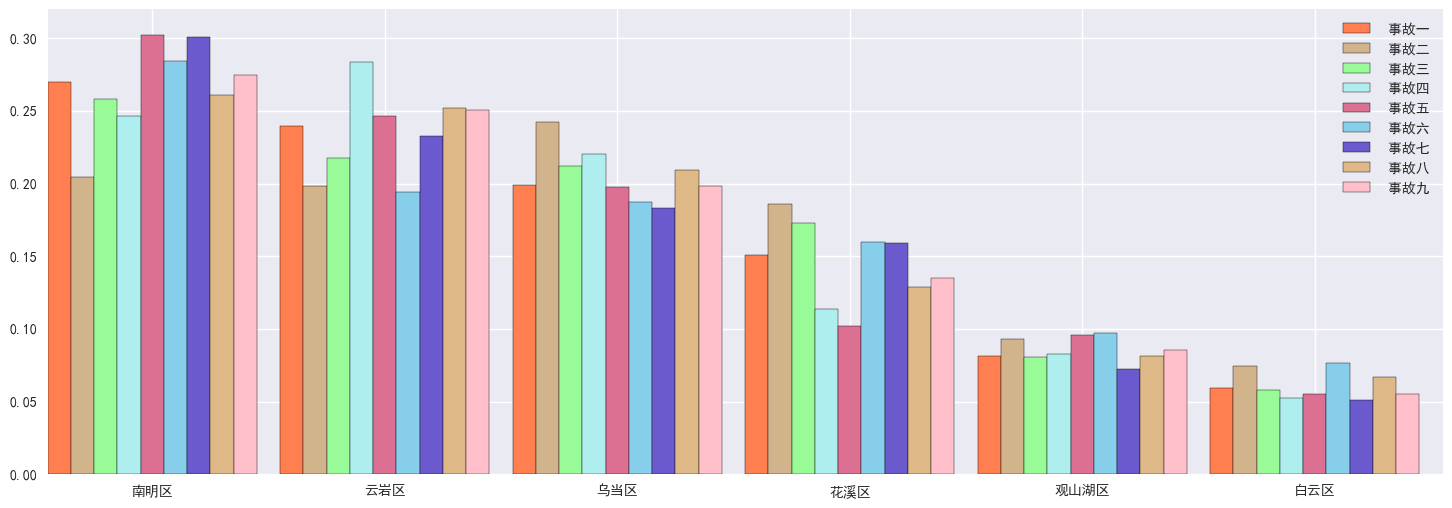

In [34]:
fig=plt.figure(facecolor="white",figsize=(18,6))
xlabel=np.arange(6)
width = 0.1
plt.bar(xlabel,fault_district[1],width,color="coral")
plt.bar(xlabel+width,fault_district[2],width,color="tan")
plt.bar(xlabel+width*2,fault_district[3],width,color="palegreen")
plt.bar(xlabel+width*3,fault_district[4],width,color="paleturquoise")
plt.bar(xlabel+width*4,fault_district[5],width,color="palevioletred")
plt.bar(xlabel+width*5,fault_district[6],width,color="skyblue")
plt.bar(xlabel+width*6,fault_district[7],width,color="slateblue")
plt.bar(xlabel+width*7,fault_district[8],width,color="burlywood")
plt.bar(xlabel+width*8,fault_district[9],width,color="pink")
plt.ylim([0,0.32])
plt.legend([" 事故一"," 事故二"," 事故三"," 事故四"," 事故五"," 事故六"," 事故七"," 事故八"," 事故九"])
plt.xticks(xlabel+0.45,["南明区","云岩区","乌当区","花溪区","观山湖区","白云区"])
plt.show()
fig.savefig("fault_district.png")

In [35]:
# print(accident_data.columns)

In [36]:
print(accident_data["clpp1"].value_counts()[1:9].sum())
print(accident_data["clpp1"].value_counts()[10:40].sum())
print(accident_data["clpp1"].value_counts()[40:].sum())
print(accident_data["clpp2"].value_counts()[0])
print(accident_data["clpp2"].value_counts()[1:9].sum())
print(accident_data["clpp2"].value_counts()[10:40].sum())
print(accident_data["clpp2"].value_counts()[40:].sum())

14218
14416
13142
12655
14444
14898
13426


In [37]:
clpp1_count=accident_data["clpp1"].value_counts()
# print(clpp1_count.index[1:9])
accident_data["clpp1"]=accident_data["clpp1"].replace("-1",0)
accident_data["clpp1"]=accident_data["clpp1"].replace(clpp1_count.index[1:10],1)
accident_data["clpp1"]=accident_data["clpp1"].replace(clpp1_count.index[10:40],2)
accident_data["clpp1"]=accident_data["clpp1"].replace(clpp1_count.index[40:],3)
print(accident_data["clpp1"].value_counts())

1    15134
2    14416
0    13753
3    13142
Name: clpp1, dtype: int64


In [38]:
clpp2_count=accident_data["clpp2"].value_counts()
accident_data["clpp2"]=accident_data["clpp2"].replace("-1",0)
accident_data["clpp2"]=accident_data["clpp2"].replace(clpp2_count.index[1:10],1)
accident_data["clpp2"]=accident_data["clpp2"].replace(clpp2_count.index[10:40],2)
accident_data["clpp2"]=accident_data["clpp2"].replace(clpp2_count.index[40:],3)
print(accident_data["clpp2"].value_counts())

1    15466
2    14898
3    13426
0    12655
Name: clpp2, dtype: int64


In [39]:
print(accident_data["jxmc1"].value_counts()[0])
print(accident_data["jxmc1"].value_counts()[1])
print(accident_data["jxmc1"].value_counts()[2:10].sum())
print(accident_data["jxmc1"].value_counts()[10:40].sum())
print(accident_data["jxmc1"].value_counts()[40:].sum())

15309
9235
10542
10934
10425


In [40]:
jxmc1_count=accident_data["jxmc1"].value_counts()
accident_data["jxmc1"]=accident_data["jxmc1"].replace(jxmc1_count.index[0],0)
accident_data["jxmc1"]=accident_data["jxmc1"].replace(jxmc1_count.index[1],1)
accident_data["jxmc1"]=accident_data["jxmc1"].replace(jxmc1_count.index[2:10],2)
accident_data["jxmc1"]=accident_data["jxmc1"].replace(jxmc1_count.index[10:40],3)
accident_data["jxmc1"]=accident_data["jxmc1"].replace(jxmc1_count.index[40:],4)
print(accident_data["jxmc1"].value_counts())

0    15309
3    10934
2    10542
4    10425
1     9235
Name: jxmc1, dtype: int64


In [41]:
print(accident_data["jxmc2"].value_counts()[0])
print(accident_data["jxmc2"].value_counts()[1])
print(accident_data["jxmc2"].value_counts()[2:10].sum())
print(accident_data["jxmc2"].value_counts()[10:40].sum())
print(accident_data["jxmc2"].value_counts()[40:].sum())

15014
11770
12063
9538
8060


In [42]:
jxmc2_count=accident_data["jxmc2"].value_counts()
accident_data["jxmc2"]=accident_data["jxmc2"].replace(jxmc2_count.index[0],0)
accident_data["jxmc2"]=accident_data["jxmc2"].replace(jxmc2_count.index[1],1)
accident_data["jxmc2"]=accident_data["jxmc2"].replace(jxmc2_count.index[2:10],2)
accident_data["jxmc2"]=accident_data["jxmc2"].replace(jxmc2_count.index[10:40],3)
accident_data["jxmc2"]=accident_data["jxmc2"].replace(jxmc2_count.index[40:],4)
print(accident_data["jxmc2"].value_counts())

0    15014
2    12063
1    11770
3     9538
4     8060
Name: jxmc2, dtype: int64


In [43]:
# print(accident_data["driver1responsibility"].value_counts())
# print(accident_data["driver2responsibility"].value_counts())
accident_data["driver1responsibility"]=accident_data["driver1responsibility"].replace("负全部责任",1)
accident_data["driver1responsibility"]=accident_data["driver1responsibility"].replace("负同等责任",0)
accident_data["driver2responsibility"]=accident_data["driver2responsibility"].replace("不负责任",1)
accident_data["driver2responsibility"]=accident_data["driver2responsibility"].replace("负同等责任",0)

print(accident_data["driver1responsibility"].value_counts())
print(accident_data["driver2responsibility"].value_counts())

1    53591
0     2854
Name: driver1responsibility, dtype: int64
1    54153
0     2292
Name: driver2responsibility, dtype: int64


In [44]:
wind_map={"东北风":1,"南风":2,"东南风":3,"东风":4}
accident_data["wind1"]=accident_data["wind1"].replace(wind_map)
accident_data["wind2"]=accident_data["wind2"].replace(wind_map)
print(accident_data["wind1"].value_counts())
print(accident_data["wind2"].value_counts())

1    26560
2    13625
3     9432
4     6828
Name: wind1, dtype: int64
1    26524
2    16007
3     8872
4     5042
Name: wind2, dtype: int64


In [45]:
accident_data["is_province1"]=accident_data["is_province1"].astype(int)
accident_data["is_city1"]=accident_data["is_city1"].astype(int)
accident_data["is_driver1_city"]=accident_data["is_driver1_city"].astype(int)
accident_data["is_driver1_province"]=accident_data["is_driver1_province"].astype(int)

print(accident_data["is_province1"].value_counts())
print(accident_data["is_city1"].value_counts())
print(accident_data["is_driver1_city"].value_counts())
print(accident_data["is_driver1_province"].value_counts())

1    52784
0     3661
Name: is_province1, dtype: int64
1    41968
0    14477
Name: is_city1, dtype: int64
0    34562
1    21883
Name: is_driver1_city, dtype: int64
1    45359
0    11086
Name: is_driver1_province, dtype: int64


In [46]:
accident_data["is_province2"]=accident_data["is_province2"].astype(int)
accident_data["is_city2"]=accident_data["is_city2"].astype(int)
accident_data["is_driver2_city"]=accident_data["is_driver2_city"].astype(int)
accident_data["is_driver2_province"]=accident_data["is_driver2_province"].astype(int)

print(accident_data["is_province2"].value_counts())
print(accident_data["is_city2"].value_counts())
print(accident_data["is_driver2_city"].value_counts())
print(accident_data["is_driver2_province"].value_counts())

1    53320
0     3125
Name: is_province2, dtype: int64
1    43358
0    13087
Name: is_city2, dtype: int64
0    31268
1    25177
Name: is_driver2_city, dtype: int64
1    46695
0     9750
Name: is_driver2_province, dtype: int64


In [47]:
accident_data["accidenttime"]=pd.to_datetime(accident_data["accidenttime"])
accident_data["maxtime_x"]=pd.to_datetime(accident_data["maxtime_x"])
accident_data["difftime_x"]=accident_data["accidenttime"]- accident_data["maxtime_x"]
accident_data["difftime_x"]=accident_data["difftime_x"].dt.days
print(accident_data["difftime_x"])

0          NaN
1        -79.0
2        -44.0
3       -184.0
4        357.0
5       -225.0
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12        17.0
13         NaN
14       -55.0
15      -268.0
16         NaN
17         NaN
18         NaN
19       198.0
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28       314.0
29         NaN
         ...  
56621      NaN
56622    400.0
56623      NaN
56624      NaN
56625      NaN
56626      NaN
56627      NaN
56628    577.0
56629      NaN
56630      NaN
56631    600.0
56632    438.0
56633      NaN
56634      NaN
56635    146.0
56636    218.0
56637      NaN
56638      NaN
56639      NaN
56640     57.0
56641      NaN
56642      NaN
56643      NaN
56644    463.0
56645     53.0
56646      NaN
56647      NaN
56648      NaN
56649    116.0
56650    128.0
Name: difftime_x, dtype: float64


In [48]:
accident_data["maxtime_y"]=pd.to_datetime(accident_data["maxtime_y"])
accident_data["difftime_y"]=accident_data["accidenttime"]- accident_data["maxtime_y"]
accident_data["difftime_y"]=accident_data["difftime_y"].dt.days
print(accident_data["difftime_y"])

0          NaN
1         52.0
2          NaN
3          NaN
4         84.0
5        -98.0
6          NaN
7        -63.0
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14       103.0
15         NaN
16       283.0
17       277.0
18       -77.0
19      -178.0
20      -219.0
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28       -96.0
29         NaN
         ...  
56621      NaN
56622    395.0
56623    591.0
56624      NaN
56625    228.0
56626      NaN
56627    151.0
56628      NaN
56629      NaN
56630    226.0
56631    116.0
56632    438.0
56633      NaN
56634      NaN
56635      NaN
56636      NaN
56637    540.0
56638      NaN
56639      NaN
56640    431.0
56641      NaN
56642    640.0
56643      NaN
56644      NaN
56645      NaN
56646      NaN
56647      NaN
56648      NaN
56649    600.0
56650    288.0
Name: difftime_y, dtype: float64


In [49]:
print(accident_data["driver1license"].value_counts()[:8])
print(accident_data["driver2license"].value_counts()[:32])

***                   63
366568519356685357     7
366360519556616050     7
364567511256646052     6
366063519247636059     6
364546519754687954     6
364555513345530958     6
364550519249494051     6
Name: driver1license, dtype: int64
***                   134
366565518141545459     43
364567519940555675     33
36636051974949095X     32
36454751874864405X     28
364547519746525271     27
366360518340637438     26
366366519041576950     24
354360511649504333     23
366360518841654276     23
364546518055424451     22
364546518540417051     20
364546512943650675     20
366360519556434481     18
366360518954604489     18
355265519354438417     17
364065511545424459     17
364546518542400675     17
364567519947467478     17
364546512646567078     16
36606651164343747X     16
355265511545562785     15
364547519441545653     15
36606251924149765X     15
366063511647586856     14
364567519154427470     14
364547518745673255     14
364566519949477087     14
366066518246567456     13
36454651214

In [50]:
accident_data["driver1license"]=accident_data["driver1license"].\
            replace("***","000000000")
accident_data["driver2license"]=accident_data["driver2license"].\
            replace("***","000000000")

In [51]:
accident_data=accident_data.drop(accident_data[accident_data["driver1license"].str.contains("000000000")==True].index,axis=0)
accident_data=accident_data.drop(accident_data[accident_data["driver2license"].str.contains("000000000")==True].index,axis=0)

In [53]:
license2_list=accident_data["driver2license"].value_counts()[:32].index
for l in license2_list:
    accident_data=accident_data.drop(accident_data[accident_data["driver2license"].str.contains(l)==True].index,axis=0)

In [54]:
print(accident_data["driver1license"].value_counts()[:5])
print(accident_data["driver2license"].value_counts()[:5])

366568519356685357    7
364550519249494051    6
364546519754687954    6
364555513345530958    6
366063519247636059    6
Name: driver1license, dtype: int64
36634551864262605X    8
364567519841607458    8
366367512156667958    8
36637451144841577X    8
364595511440406558    8
Name: driver2license, dtype: int64


In [55]:
driver1_map=["driver1fault","driver1responsibility","sex1","carcolor1","clpp1",
             "jxmc1","accident_month","accident_quarter","accident_weekday",
             "accident_day","accident_hour","accident_minute","is_province1",
             "is_city1","is_driver1_city","is_driver1_province","driver1_days",
             "driver1_years","driver1_age","temperature_max","temperature_min",
             "weather1","weather2","wind1","wind2","district","lng","lat",
             "driver1_age_category","driver1_year_category",
              "fine_x", "score_x", "maxtime_x", "xfcount_x", "wfxw_x","difftime_x" 
             ]

In [56]:
driver1_info=accident_data.loc[:,driver1_map]
print(driver1_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55318 entries, 0 to 56650
Data columns (total 36 columns):
driver1fault             55318 non-null int64
driver1responsibility    55318 non-null int64
sex1                     55318 non-null int64
carcolor1                55317 non-null float64
clpp1                    55318 non-null int64
jxmc1                    55318 non-null int64
accident_month           55318 non-null int64
accident_quarter         55318 non-null int64
accident_weekday         55318 non-null int64
accident_day             55318 non-null int64
accident_hour            55318 non-null int64
accident_minute          55318 non-null int64
is_province1             55318 non-null int32
is_city1                 55318 non-null int32
is_driver1_city          55318 non-null int32
is_driver1_province      55318 non-null int32
driver1_days             44498 non-null float64
driver1_years            55318 non-null int32
driver1_age              54267 non-null float64
temperature

In [57]:
driver1_info.to_csv("driver1_info.csv",encoding="utf-8",index=False)

In [58]:
# print(driver1_info.head())

In [59]:
driver2_map=["driver1fault","driver2responsibility","sex2","carcolor2","clpp2",
             "jxmc2","accident_month","accident_quarter","accident_weekday",
             "accident_day","accident_hour","accident_minute","is_province2",
             "is_city2","is_driver2_city","is_driver2_province","driver2_days",
             "driver2_years","driver2_age","temperature_max","temperature_min",
             "weather1","weather2","wind1","wind2","district","lng","lat",
             "driver2_age_category","driver2_year_category",
              "fine_y", "score_y", "maxtime_y", "xfcount_y", "wfxw_y", "difftime_y"
             ]
driver2_info=accident_data.loc[:,driver2_map]
print(driver2_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55318 entries, 0 to 56650
Data columns (total 36 columns):
driver1fault             55318 non-null int64
driver2responsibility    55318 non-null int64
sex2                     55318 non-null int64
carcolor2                55318 non-null int64
clpp2                    55318 non-null int64
jxmc2                    55318 non-null int64
accident_month           55318 non-null int64
accident_quarter         55318 non-null int64
accident_weekday         55318 non-null int64
accident_day             55318 non-null int64
accident_hour            55318 non-null int64
accident_minute          55318 non-null int64
is_province2             55318 non-null int32
is_city2                 55318 non-null int32
is_driver2_city          55318 non-null int32
is_driver2_province      55318 non-null int32
driver2_days             41959 non-null float64
driver2_years            55318 non-null int32
driver2_age              54128 non-null float64
temperature_m

In [60]:
driver2_info.to_csv("driver2_info.csv",encoding="utf-8",index=False)